In [23]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numba

In [44]:
def x0(I, delta = 0.25, xgate = 0.325, vmin = 0, vmax = 1):
    I = np.array(I)
    I = np.clip(I, vmin, delta)
    return xgate + np.sum(I)

In [142]:
def func(x, a = 1.75):
    return min(a*x,a*(1-x))

In [46]:
def logic(fn, I, niter, n_iter_cut = 4, x_gate = 0.325):
    if niter>n_iter_cut: x_star = 0.4
    else: x_star = 0.75
    I = np.array(I)
    x_in = x0(I, xgate = x_gate)
    x_out = x_in
    for num in range(niter):
        x_out = fn(x_out)
    if x_out<=x_star: return 0
    else: return 1

In [47]:
def logic_for_reet(fn, I, x_star, x_gate, niter = 1):
    I = np.array(I)
    x_in = x0(I, xgate = x_gate)
    x_out = x_in
    for num in range(niter):
        x_out = fn(x_out)
    if x_out<=x_star: return 0
    else: return 1

In [48]:
def gate_identifier(x_star, x_gate, niter = 1):
    inp = [[0,0], [0,1], [1,1]]
    #gate = {"NAND": 1, "AND":2, "NOR":3, "XOR":4, "OR":5}
    string = ''
    for input in inp:
        string += str(logic_for_reet(func, input, x_star, x_gate))
    return(int(string, 2))

In [32]:
master = []
x_gate_all = np.linspace(0, 0.5, 100)
for i in x_gate_all:
    gate = []
    for niter in range(10):
        gate.append(gate_identifier(niter+1, x_gate = i))
    master.append(gate)

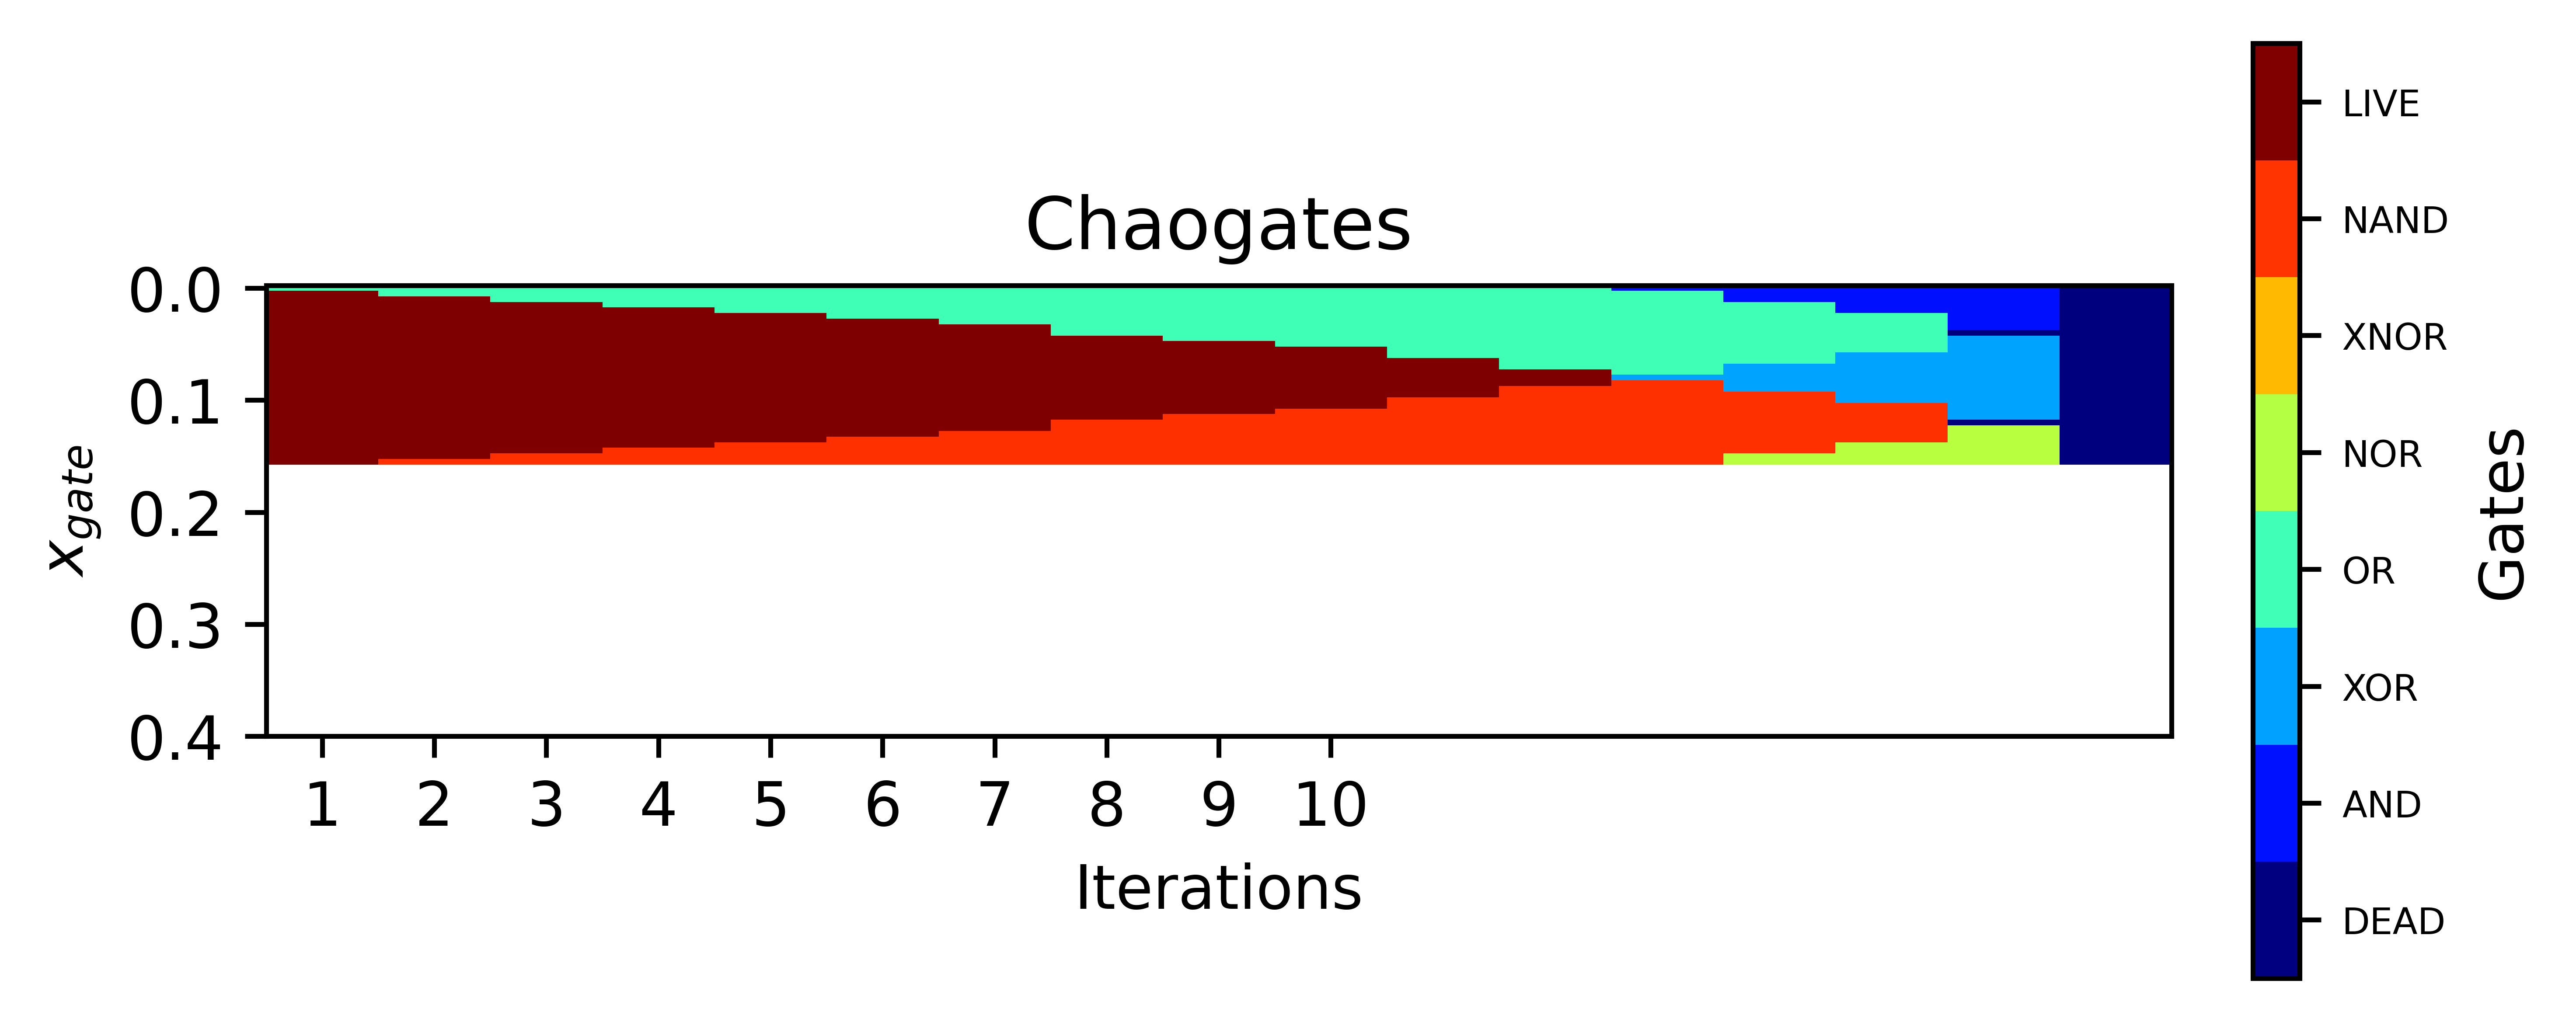

In [134]:
fig = plt.figure(dpi = 1000)
im = plt.imshow(master, aspect = 0.05, cmap = 'jet')
plt.title('Chaogates')
_ = plt.xticks(np.arange(0,10,1), np.arange(1,11,1))
_ = plt.yticks(np.arange(0,100,20))
_ = plt.yticks(np.arange(0,100,20), np.round(np.arange(0,0.5,0.1),2))
plt.xlabel('Iterations')
plt.ylabel('$x_{gate}$')

cmap = mpl.cm.jet
bounds = [0,1,2,3,4,5,6,7,8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    fraction = 0.023,
    ticks=bounds[:-1],
    spacing='uniform',
    orientation='vertical',
    label='Gates',
    pad = 0.04
)
tick_locs = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
cbar.set_ticks(tick_locs)
cbar.ax.set_yticklabels(['DEAD', 'AND', 'XOR', 'OR', 'NOR', 'XNOR', 'NAND', 'LIVE'], fontsize = 6)
plt.show()

In [118]:
master = []
x_gate_all = np.arange(0, 0.5, 1/64)
for i in x_gate_all:
    gate = []
    for x_star in np.arange(0,1+1/16,1/16):
        gate.append(gate_identifier(x_star, i))
    master.append(gate)

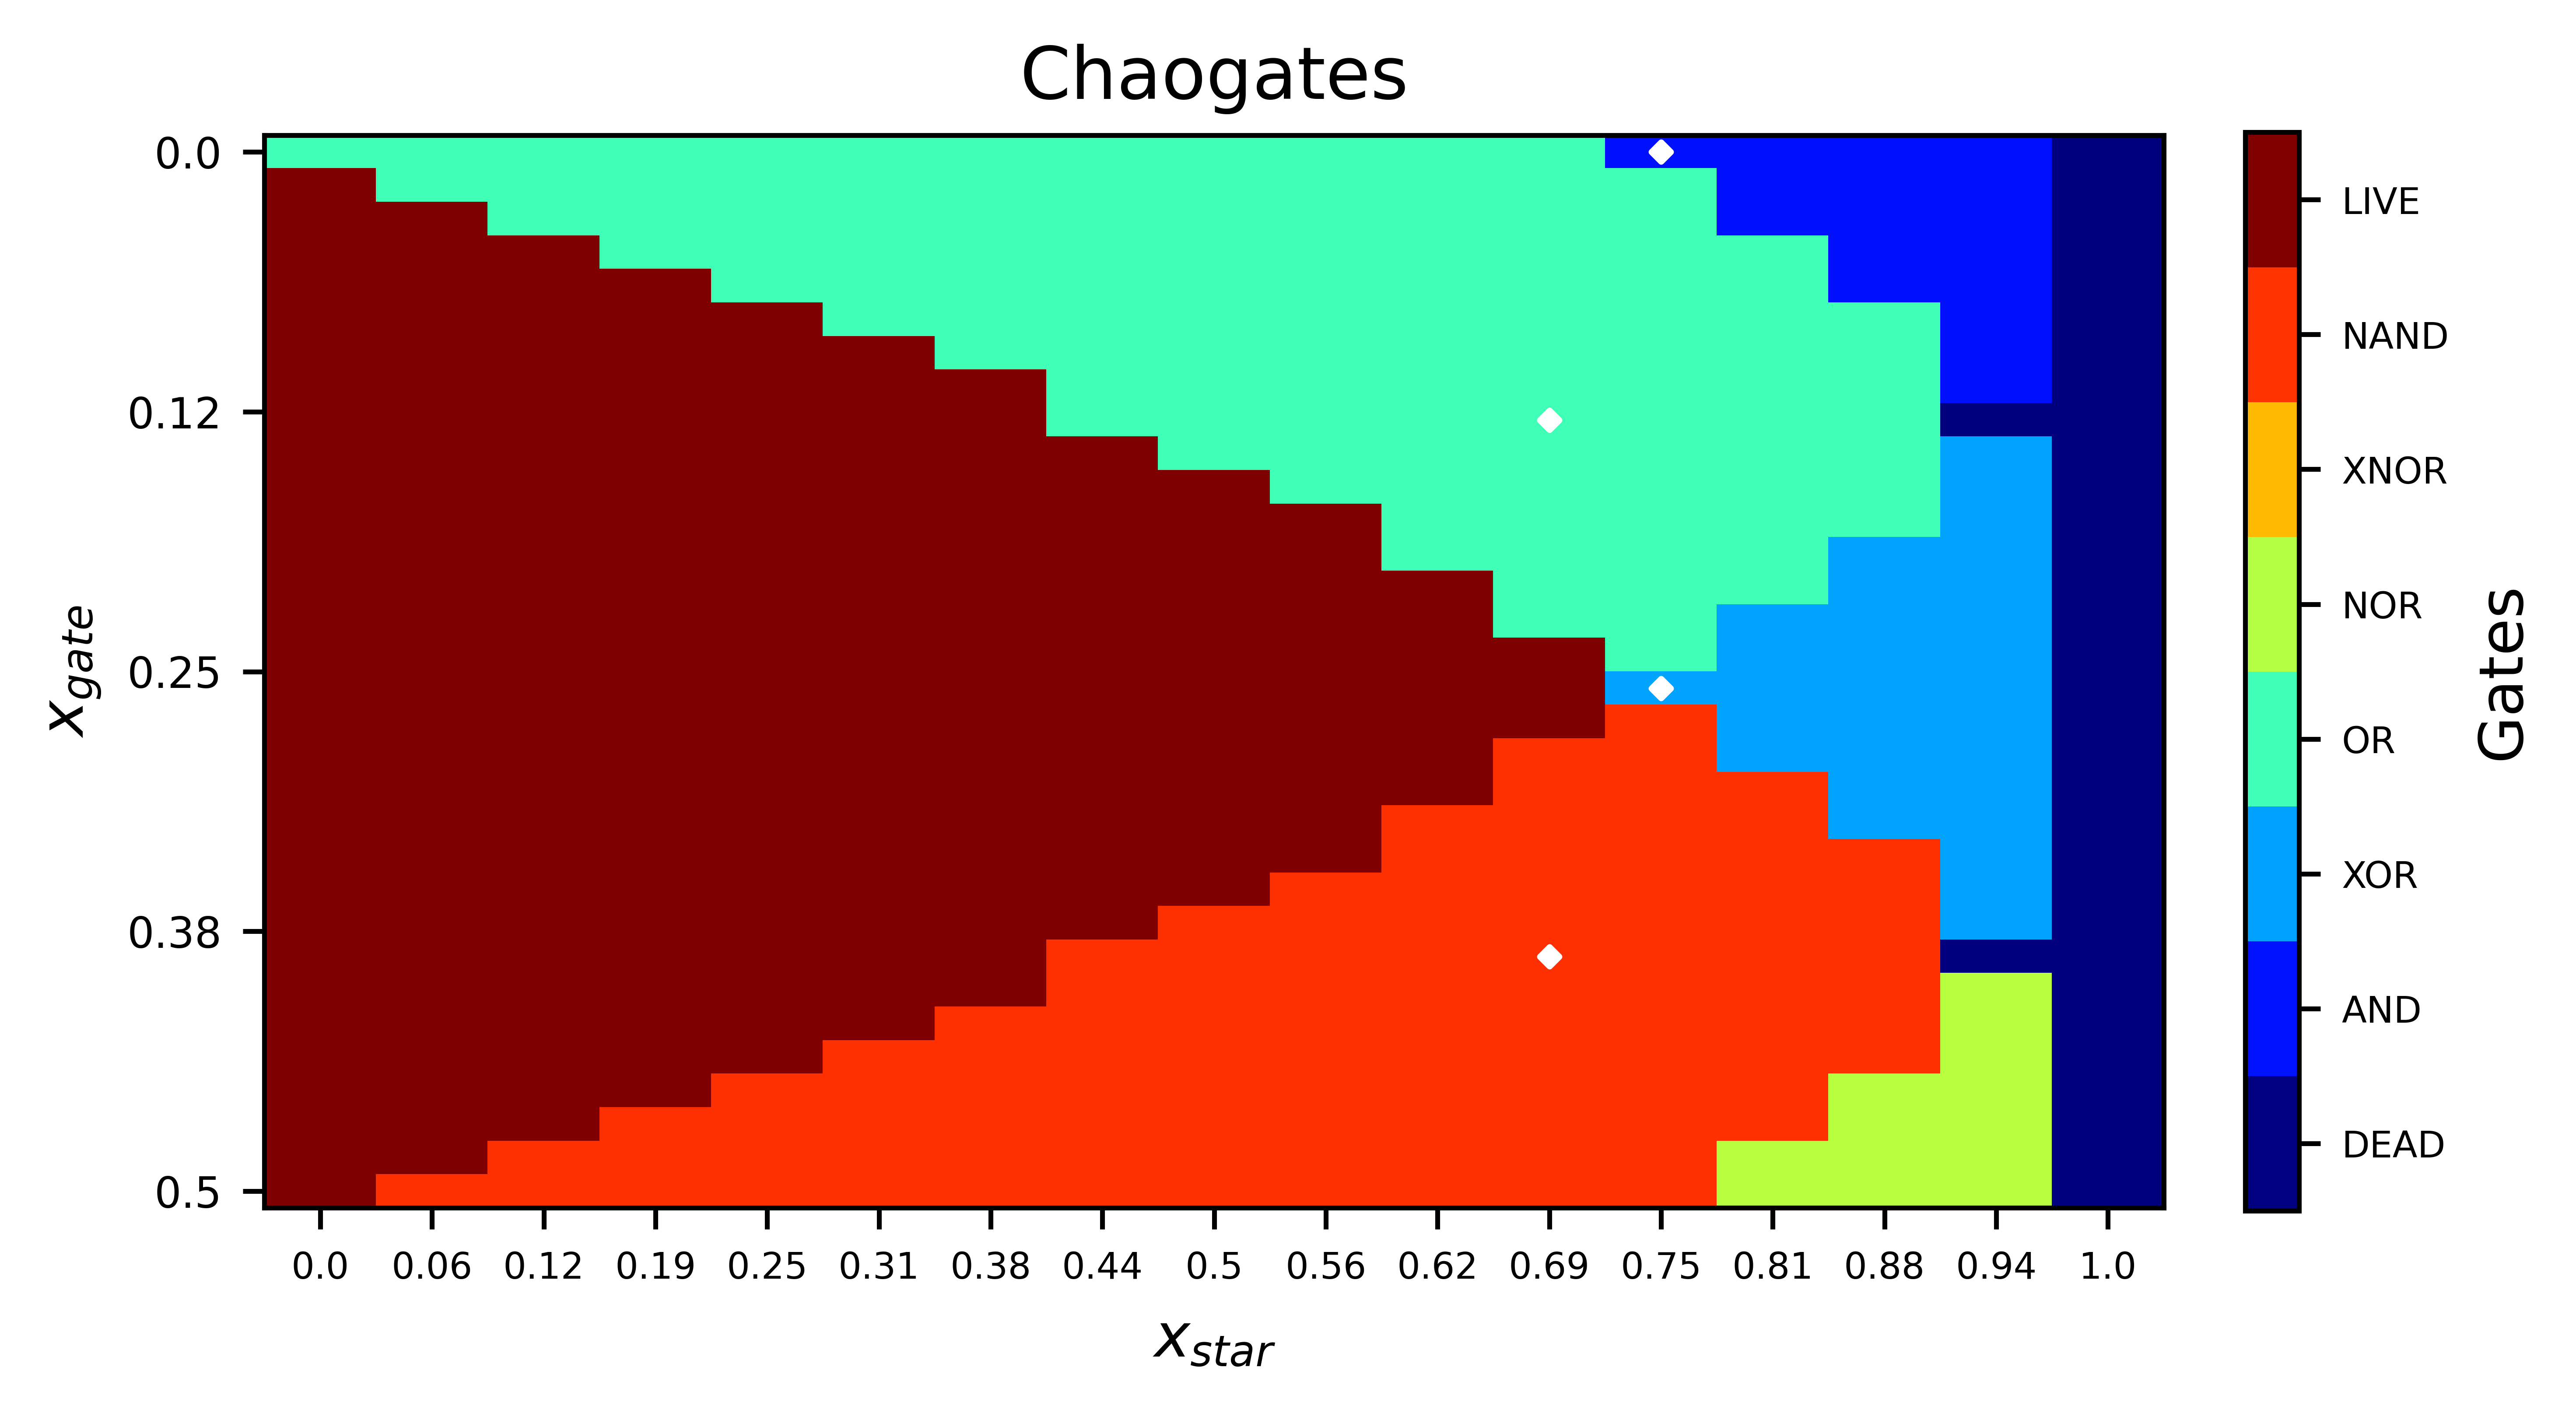

In [141]:
fig = plt.figure(dpi = 1000)
im = plt.imshow(master, aspect = 0.3, cmap = 'jet')
#x_star - 3/4,0), 11/16, 1/8), 3/4, 1/4), 11/16,3/8)
plt.scatter([12, 11, 12, 11], [0, 64/8, 64/4, 3/8*64], s = 5, color = 'white', marker = 'D')
plt.title('Chaogates')
_ = plt.xticks(np.arange(0,17,1), np.round(np.arange(0,17,1)/16,2), fontsize = 6)
_ = plt.yticks(np.arange(0,32,6))
_ = plt.yticks(np.linspace(0,31,5), np.round(np.linspace(0,0.5,5),2), fontsize = 7)
plt.xlabel('$x_{star}$')
plt.ylabel('$x_{gate}$')

cmap = mpl.cm.jet
bounds = [0,1,2,3,4,5,6,7,8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    fraction = 0.0265,
    ticks=bounds[:-1],
    spacing='uniform',
    orientation='vertical',
    label='Gates',
    pad = 0.04
)
tick_locs = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
cbar.set_ticks(tick_locs)
cbar.ax.set_yticklabels(['DEAD', 'AND', 'XOR', 'OR', 'NOR', 'XNOR', 'NAND', 'LIVE'], fontsize = 6)
plt.show()